In [5]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
from MDAnalysis.analysis.rdf import InterRDF
from MDAnalysis.analysis.rms import rmsd

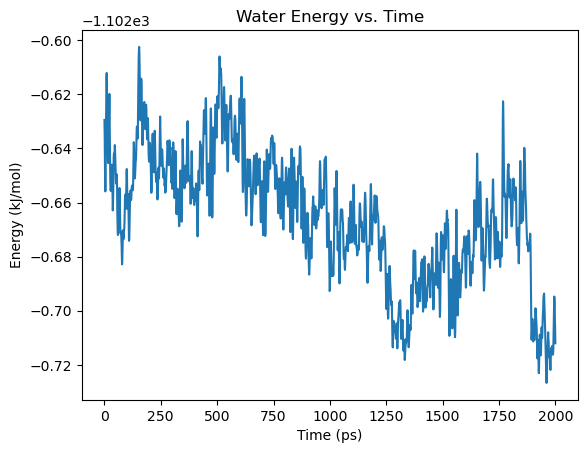

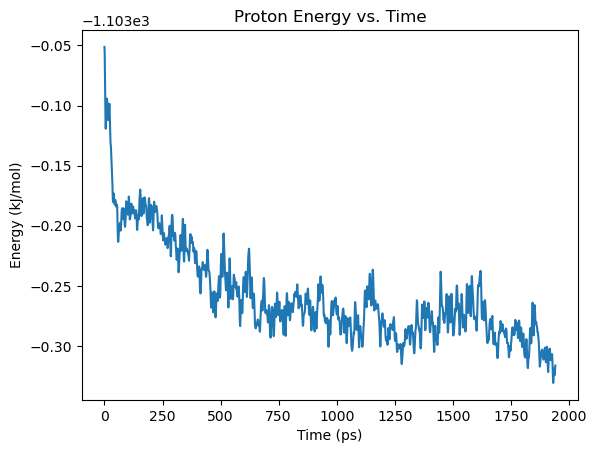

In [6]:
# Load energy data from .ener file
energies = ['Runs/Water/water_aimd_1ps_every0.5fs-1.ener',
           'Runs/Proton/proton_aimd_1ps_every0.5fs-1.ener']

for item in energies:
    ener_data = np.loadtxt(item, skiprows=1)  

    # Extract time and energy
    time = ener_data[:, 0]  # Assuming time is in the first column
    energy = ener_data[:, 4]  # Assuming energy is in the second column

    # Plot energy versus time
    plt.plot(time, energy)
    plt.xlabel('Time (ps)')
    plt.ylabel('Energy (kJ/mol)')
    if item=='Runs/Water/water_aimd_1ps_every0.5fs-1.ener':
        plt.title('Water Energy vs. Time')
        plt.savefig('Figures/water_ener_time.png')
    else:
        plt.title('Proton Energy vs. Time')
        plt.savefig('Figures/proton_ener_time.png')
    plt.show()


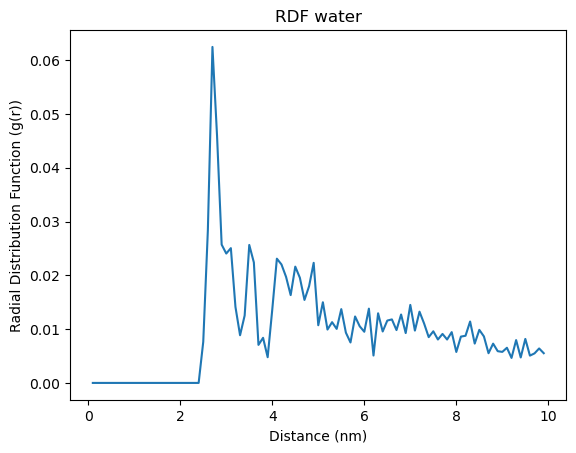

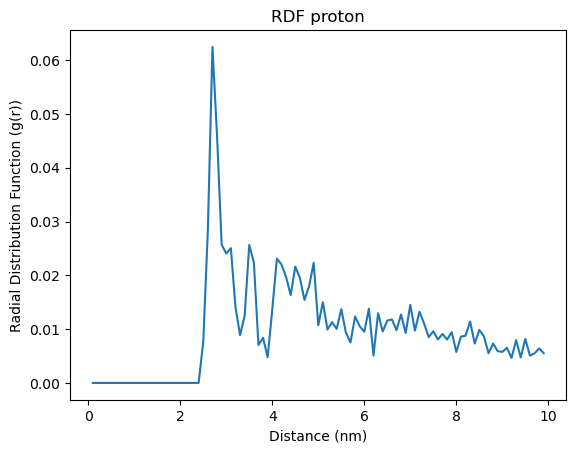

In [31]:
trajectory_wat='Runs/Water/water.xyz'
trajectory_pro='Runs/Proton/proton.xyz'

def compute_rdf(traj_file, selection1='O', selection2='O', bins=100, r_max=12.42):
    # Load trajectory and topology
    u = mda.Universe(traj_file,format="XYZ")

    oxygen_atoms = u.select_atoms('name O')

    # Get the number of frames in the trajectory
    num_frames = len(u.trajectory)

    # Initialize an array to store pairwise distances within oxygen molecules
    distances = np.zeros((num_frames, len(oxygen_atoms), len(oxygen_atoms)))

    # Loop through frames and compute pairwise distances
    for i, ts in enumerate(u.trajectory):
        positions = oxygen_atoms.positions
        differences = positions[:, np.newaxis, :] - positions
        squared_distances = np.sum(differences**2, axis=-1)
        np.sqrt(squared_distances, out=distances[i])

    # Flatten the distances array to get all pairwise distances within oxygen molecules
    all_distances = distances.flatten()

    # Define bins for RDF
    bins = np.linspace(0.1, 10, 100)

    # Compute the histogram of distances
    hist, edges = np.histogram(all_distances, bins=bins)

    # Compute the volume of each shell
    shell_volumes = 4/3 * np.pi * (edges[1:]**3 - edges[:-1]**3)

    # Compute the RDF
    rdf = hist / (shell_volumes * num_frames * len(oxygen_atoms))

    # Plot the RDF
    plt.plot(edges[:-1], rdf)
    plt.xlabel('Distance (nm)')
    plt.ylabel('Radial Distribution Function (g(r))')
    plt.title('RDF '+f'{outputs[item]}')
    plt.savefig('Figures/rdf_'+f'{outputs[item]}.png')
    plt.show()
    
outputs={'Runs/Water/water.xyz': 'water', 'Runs/Proton/proton.xyz':'proton'}

for item in outputs:
    compute_rdf(item)